/tmp/ipykernel_423/4257331448.py:18: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])
/tmp/ipykernel_423/4257331448.py:23: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])


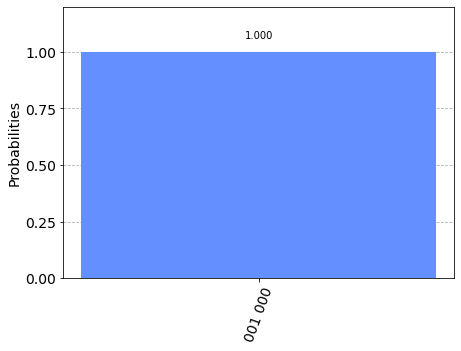

In [8]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi/2, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.rx(pi/2, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.rx(-pi/2, qreg_q[0])
circuit.rx(-pi/2, qreg_q[1])
circuit.measure_all()


aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)



ibmqfactory.load_account:WARNING:2022-05-08 13:28:01,310: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_quito
least busy backend:  ibmq_quito
Job Status: job has successfully run


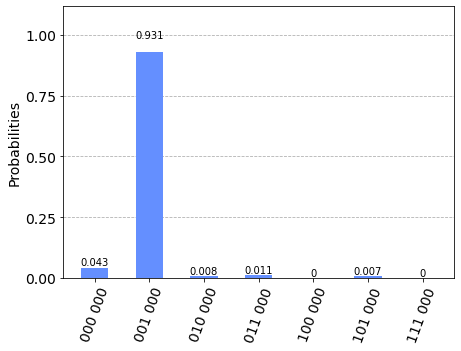

In [10]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

# Get the results from the computation
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)